# feature matching 

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 


In [3]:
def display(img,cmap="gray"):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap="gray")

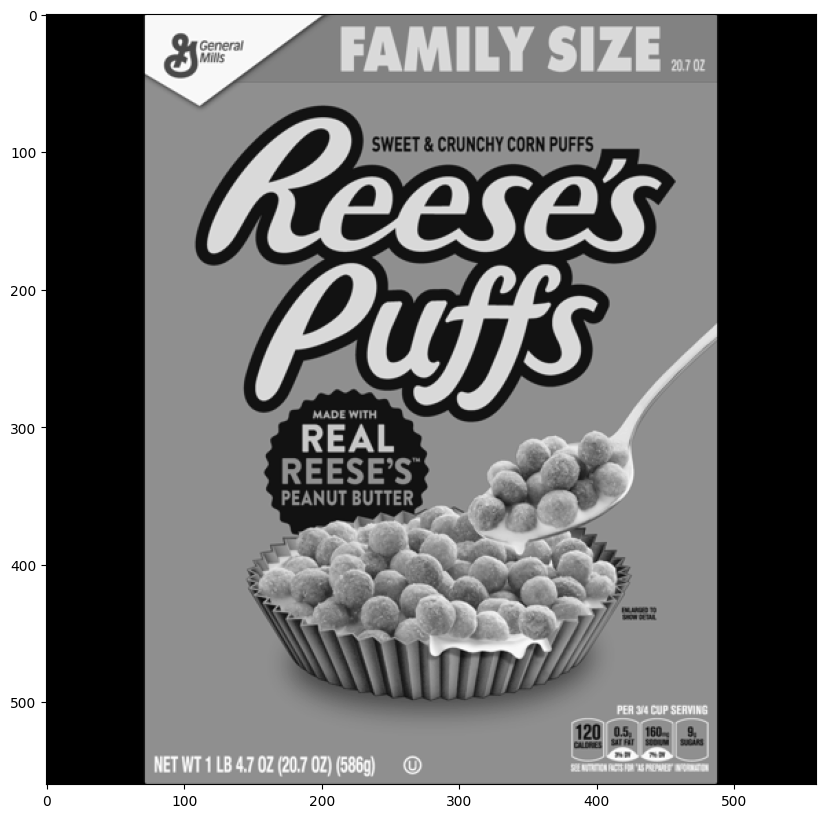

In [4]:
reeses=cv2.imread("DATA/reeses_puffs.png",0)
display(reeses)

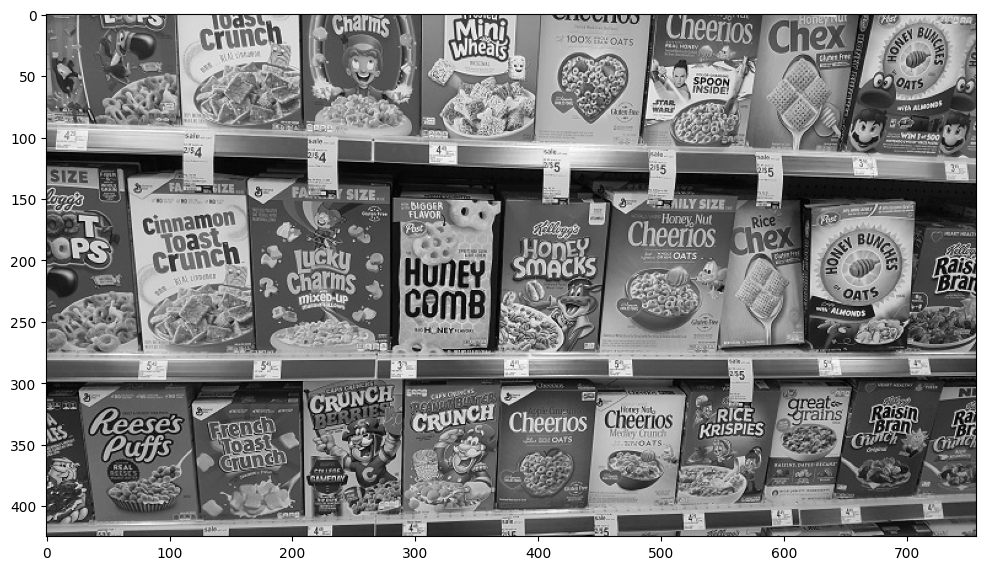

In [5]:
cereals=cv2.imread("DATA/many_cereals.jpg",0)
display(cereals)


In [6]:
orb=cv2.ORB_create()

In [7]:
kp1,des1=orb.detectAndCompute(reeses,None)
kp2,des2=orb.detectAndCompute(cereals,None)

In [9]:
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches=bf.match(des1,des2)

In [10]:
matches=sorted(matches,key=lambda x: x.distance)

In [13]:
reeses_mathces=cv2.drawMatches(reeses,kp1,cereals,kp2,matches,None,flags=2)

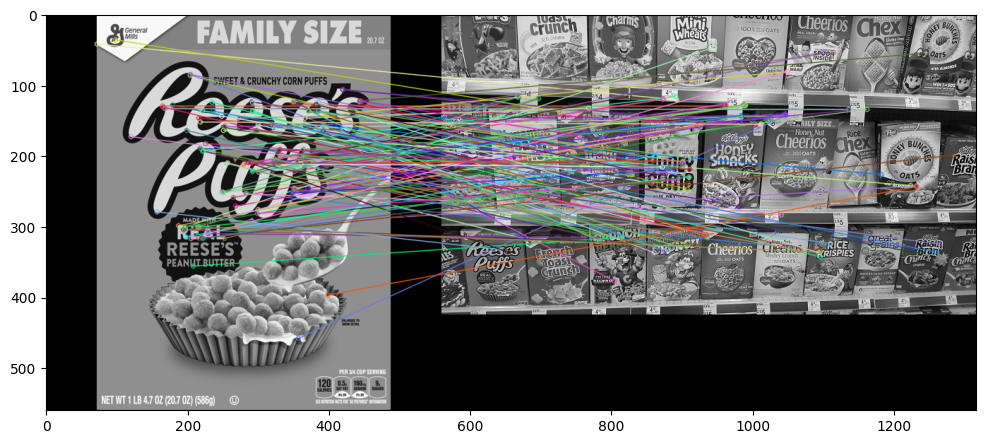

In [14]:
display(reeses_mathces)

# part2 

# sift descriptors

In [17]:
pip install opencv-contrib-python

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.3 MB 487.6 kB/s eta 0:01:33
   ---------------------------------------- 0.1/45.3 MB 409.6 kB/s eta 0:01:51
   ---------------------------------------- 0.1/45.3 MB 409.6 kB/s eta 0:01:51
   ---------------------------------------- 0.1/45.3 MB 348.6 kB/s eta 0:02:10
   ---------------------------------------- 0.1/45.3 MB 348.6 kB/s eta 0:02:10
   ---------------------------------------- 0.1/45.3 MB 348.6 kB/s eta 0:02:10
   ---------------------------------------- 0.1/45.3 MB 284.4 kB/s eta 0:02:39
   ---------------------------------------- 0.1/45.3 MB 284.4 kB/s eta 0:02:39
   -------

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\socke

   ---------------- ----------------------- 18.9/45.3 MB 30.6 kB/s eta 0:14:23
   ---------------- ----------------------- 18.9/45.3 MB 30.6 kB/s eta 0:14:23
   ---------------- ----------------------- 18.9/45.3 MB 30.6 kB/s eta 0:14:23
   ---------------- ----------------------- 18.9/45.3 MB 30.6 kB/s eta 0:14:23
   ---------------- ----------------------- 18.9/45.3 MB 30.6 kB/s eta 0:14:23
   ---------------- ----------------------- 18.9/45.3 MB 30.6 kB/s eta 0:14:23
   ---------------- ----------------------- 18.9/45.3 MB 30.6 kB/s eta 0:14:23
   ---------------- ----------------------- 18.9/45.3 MB 30.6 kB/s eta 0:14:23
   ---------------- ----------------------- 18.9/45.3 MB 30.6 kB/s eta 0:14:23
   ---------------- ----------------------- 18.9/45.3 MB 30.6 kB/s eta 0:14:23
   ---------------- ----------------------- 18.9/45.3 MB 30.6 kB/s eta 0:14:23
   ---------------- ----------------------- 18.9/45.3 MB 30.6 kB/s eta 0:14:23
   ---------------- ----------------------- 18.9/45.

In [19]:
# Create SIFT Object
#sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

# cv2.drawMatchesKnn expects list of lists as matches.
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

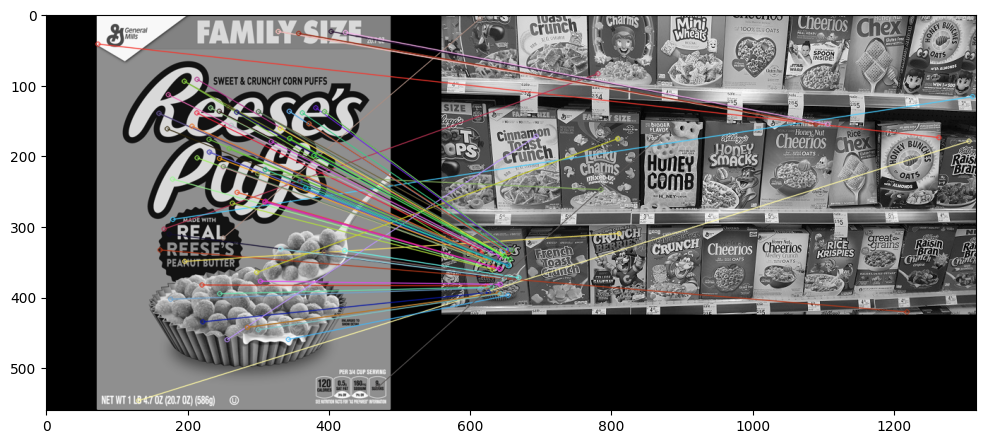

In [20]:
display(sift_matches)

# part3 

# flann based matching 

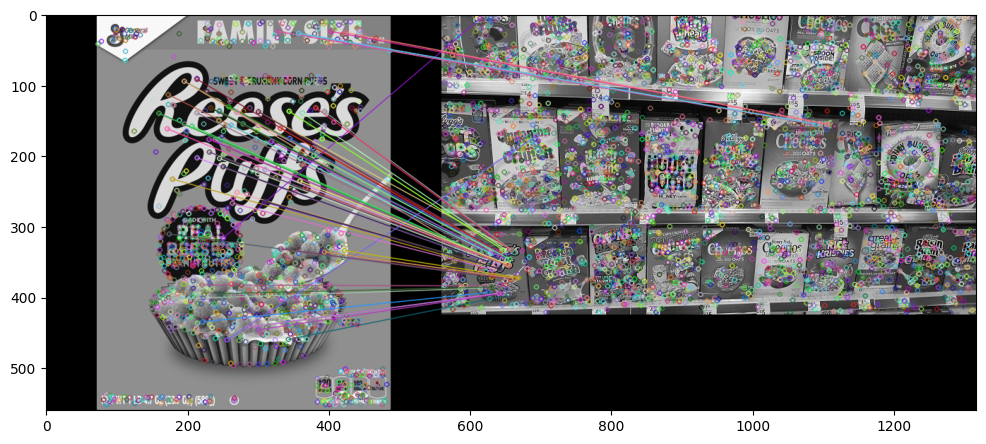

In [21]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        
        good.append([match1])


flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=0)

display(flann_matches)

In [ ]:
c